<a href="https://colab.research.google.com/github/kevin9549/Data-Science-Project/blob/main/EDA_BA_reveiws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS


In [ ]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

df = df.reset_index(drop=True)

In [ ]:
df.iloc[1739:1750]

,reviews,stars,date,country,verified,corpus
1739,✅ Verified Review | London Heathrow to Paris ...,6.0,2017-06-23,United States,False,review london heathrow paris orly gold member ...
1740,✅ Verified Review | Flew New York JFK to Cope...,1.0,2017-06-22,United States,False,review flew new york jfk copenhagen via heathr...
1741,✅ Verified Review | Flew London to Hamburg. I...,1.0,2017-06-21,United Kingdom,False,review flew london hamburg cannot believe airl...
1742,✅ Verified Review | British Airways charges a...,10.0,2017-06-20,United Kingdom,False,review british airway charge big premium premi...
1743,✅ Verified Review | Singapore to London. I ha...,2.0,2017-06-20,United Kingdom,False,review singapore london started take british a...
1744,✅ Verified Review | This was my first flight ...,1.0,2017-06-19,Canada,False,review first flight toronto london crewed mixe...
1745,✅ Verified Review | I arrived at London Heath...,1.0,2017-06-18,France,False,review arrived london heathrow transit british...
1746,✅ Verified Review | The crews on both the outb...,1.0,2017-06-17,South Africa,False,review crew outbound inbound flight johannesbu...
1747,✅ Verified Review | Flew Valencia to London G...,2.0,2017-06-16,United Kingdom,False,review flew valencia london gatwick british ai...
1748,✅ Verified Review | London Heathrow to Edinbu...,1.0,2017-06-16,United Kingdom,False,review london heathrow edinburgh return possib...


#### Berapa rata-rata rating keseluruhan yang diberikan untuk British Airways?

In [ ]:
df.stars.mean()

4.694588969823101

#### Berapa total jumlah untuk setiap rating?

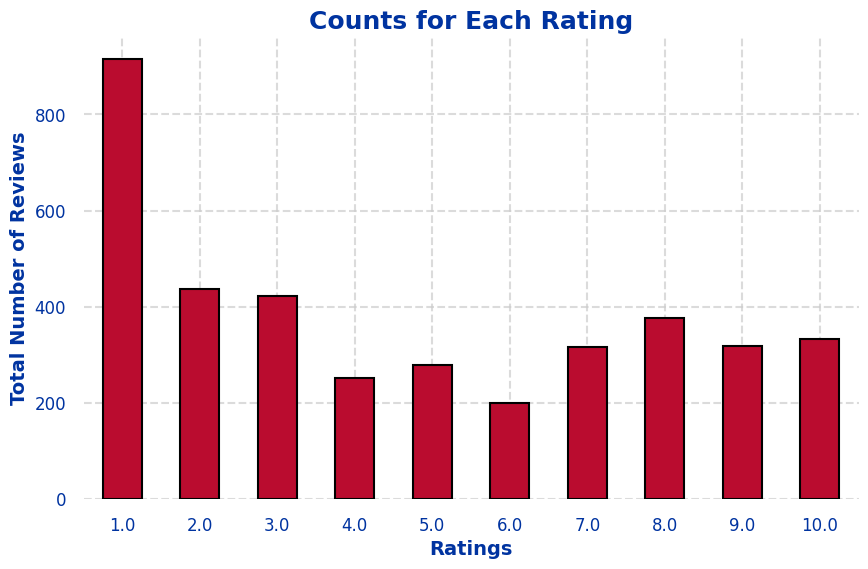

In [ ]:

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
ax = df.stars.value_counts().sort_index().plot(kind="bar", color="#BA0C2F", edgecolor="black")

ax.set_xlabel("Ratings", fontsize=14, color="#0033A0", weight='bold')
ax.set_ylabel("Total Number of Reviews", fontsize=14, color="#0033A0", weight='bold')
plt.title("Counts for Each Rating", fontsize=18, color="#0033A0", weight='bold')

ax.grid(True, linestyle='--', alpha=0.7)

ax.tick_params(axis='x', colors="#0033A0", labelsize=12, rotation=0)
ax.tick_params(axis='y', colors="#0033A0", labelsize=12)

sns.despine(left=True, bottom=True)

# Show plot
plt.show()

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())


In [ ]:
df_ratings.head()

,count
stars,
1.0,915
2.0,436
3.0,423
8.0,376
10.0,332


In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [ ]:
df_ratings.head()

,Stars,total_counts
0,1.0,915
1,2.0,436
2,3.0,423
3,8.0,376
4,10.0,332


In [ ]:
# renaming columns
df_ratings.rename(columns={'stars':'Stars', 'count':'total_counts'}, inplace=True)

In [ ]:
pct_values = (df_ratings.Stars.values/ df_ratings.Stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
print(df_ratings.columns)


Index(['Stars', 'total_counts', 'pct_values'], dtype='object')


<ipython-input-72-34b047069978>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




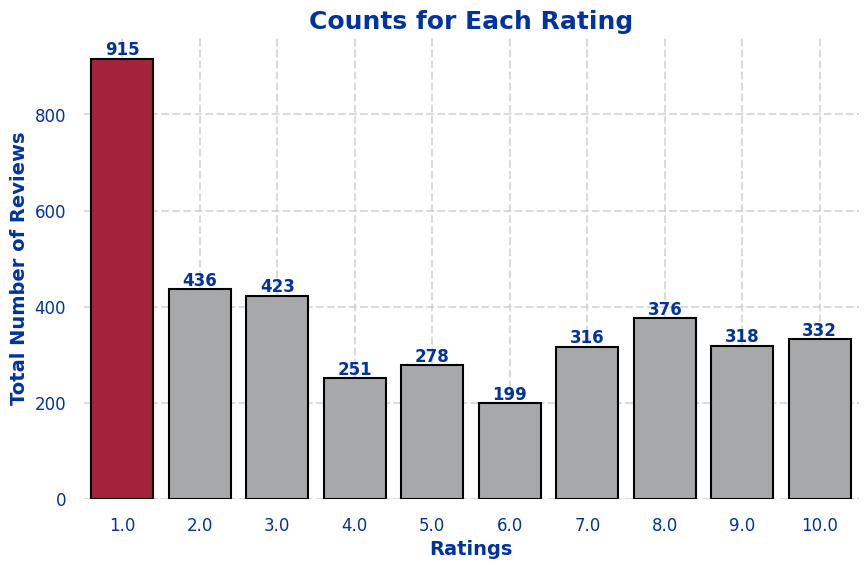

In [ ]:
# Buat palette warna berdasarkan kondisi
colors = ['#BA0C2F' if (x == max(df_ratings.total_counts)) else '#A7A8AA' for x in df_ratings.total_counts]

# Tambahkan kolom ke DataFrame untuk hue
df_ratings['color'] = colors

# Buat grafik batang dengan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Stars', y='total_counts', data=df_ratings, palette=colors, edgecolor='black', err_kws={'linewidth': 0})

# Tambahkan label ke setiap batang
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color="#0033A0", weight='bold')

# Setel label dan judul dengan nuansa British Airways
ax.set_xlabel("Ratings", fontsize=14, color="#0033A0", weight='bold')
ax.set_ylabel("Total Number of Reviews", fontsize=14, color="#0033A0", weight='bold')
ax.set_title("Counts for Each Rating", fontsize=18, color="#0033A0", weight='bold')

# Tambahkan grid dengan gaya putus-putus
ax.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='x', colors="#0033A0", labelsize=12, rotation=0)
ax.tick_params(axis='y', colors="#0033A0", labelsize=12)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Tampilkan plot
plt.show()

In [ ]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

73 unique countries


#### Dari negara mana ulasan terbanyak berasal?

In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
print(df_country_review.columns)
df_country_review.head()

Index(['country', 'total_reviews'], dtype='object')


,country,total_reviews
0,United Kingdom,2410
1,United States,439
2,Australia,161
3,Canada,123
4,Germany,67


In [ ]:
df_country_review.rename(columns={'country':'country','count':'total_reviews'}, inplace=True)

<Figure size 1200x800 with 0 Axes>

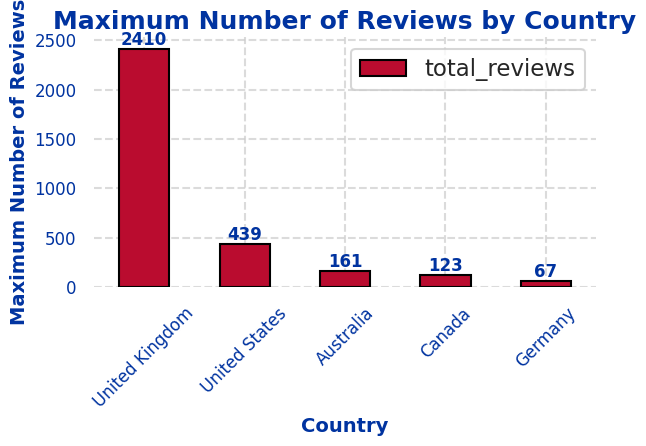

In [ ]:
# Set style and context
sns.set(style="whitegrid", context="talk")

# Ukuran plot
plt.figure(figsize=(12, 8))

# Buat grafik batang
ax = df_country_review.plot(kind="bar", x='country', color='#BA0C2F', edgecolor='black')

# Setel label dan judul dengan nuansa British Airways
ax.set_xlabel("Country", fontsize=14, color="#0033A0", weight='bold')
ax.set_ylabel("Maximum Number of Reviews", fontsize=14, color="#0033A0", weight='bold')
ax.set_title("Maximum Number of Reviews by Country", fontsize=18, color="#0033A0", weight='bold')

# Tambahkan grid dengan gaya putus-putus
ax.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='x', colors="#0033A0", labelsize=12, rotation=45)
ax.tick_params(axis='y', colors="#0033A0", labelsize=12)

# Tambahkan label pada setiap batang
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color="#0033A0", weight='bold')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Sesuaikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

#### Negara mana yang memberikan rata-rata rating tertinggi?

In [ ]:
print(df['stars'].dtype)


float64


In [ ]:
df = df.dropna(how='all')


In [ ]:
# Convert the 'stars' column to numeric, handling non-numeric values
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Calculate the mean rating by country
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()

# Display the result
print(df_country_rating)

               country      stars
0   Dominican Republic  10.000000
1                 Oman  10.000000
2           Costa Rica   9.000000
3              Ecuador   9.000000
4             Slovakia   7.333333
..                 ...        ...
68             Romania   1.000000
69              Panama   1.000000
70              Jordan   1.000000
71           Indonesia   1.000000
72             Vietnam   1.000000

[73 rows x 2 columns]


In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


In [ ]:
print(df_country_rating)

               country  avg_rating
0   Dominican Republic   10.000000
1                 Oman   10.000000
2           Costa Rica    9.000000
3              Ecuador    9.000000
4             Slovakia    7.333333
..                 ...         ...
68             Romania    1.000000
69              Panama    1.000000
70              Jordan    1.000000
71           Indonesia    1.000000
72             Vietnam    1.000000

[73 rows x 2 columns]


<ipython-input-74-9dbeed404c6c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




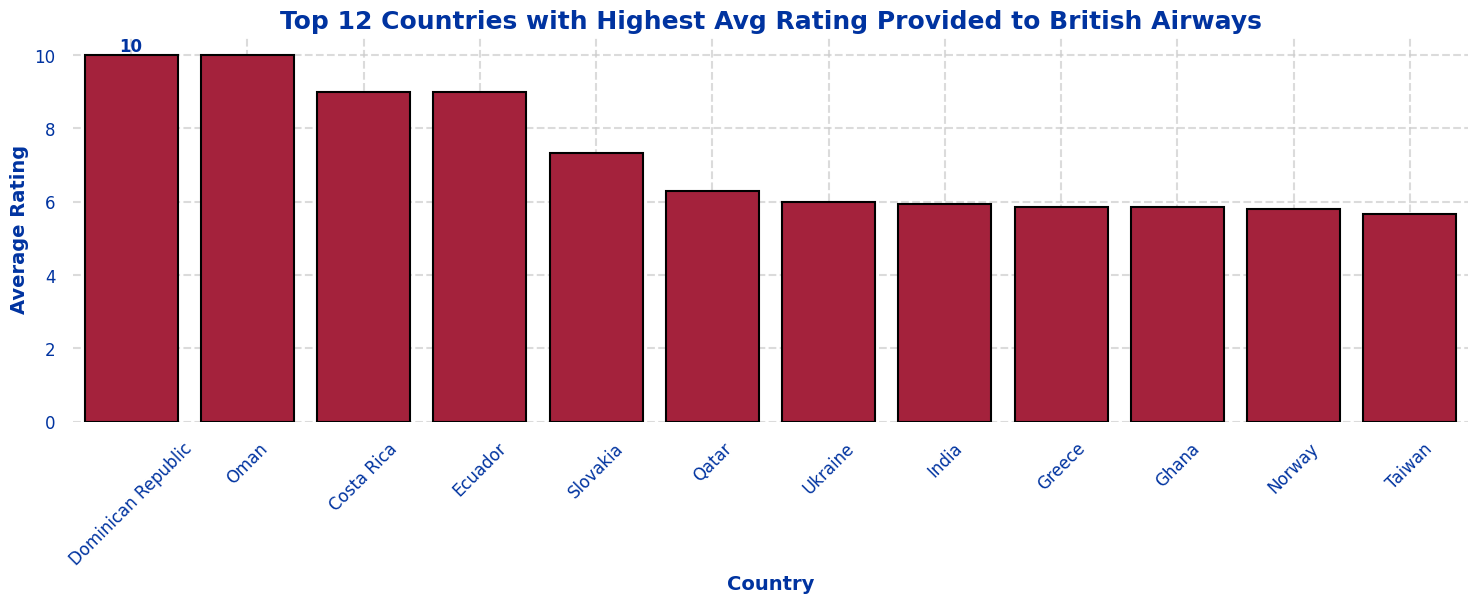

In [ ]:
# Set style and context
sns.set(style="whitegrid", context="talk")

# Ukuran plot
fig, ax = plt.subplots(figsize=(18, 5))

# Buat grafik batang dengan seaborn
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12], palette=['#BA0C2F'] * 12, edgecolor='black')

# Tambahkan label ke setiap batang
ax1.bar_label(ax1.containers[0], fontsize=12, color="#0033A0", weight='bold')

# Setel label dan judul dengan nuansa British Airways
ax1.set_xlabel("Country", fontsize=14, color="#0033A0", weight='bold')
ax1.set_ylabel("Average Rating", fontsize=14, color="#0033A0", weight='bold')
ax1.set_title("Top 12 Countries with Highest Avg Rating Provided to British Airways", fontsize=18, color="#0033A0", weight='bold')

# Customize ticks
ax1.tick_params(axis='x', colors="#0033A0", labelsize=12, rotation=45)
ax1.tick_params(axis='y', colors="#0033A0", labelsize=12)

# Tambahkan grid dengan gaya putus-putus
ax1.grid(True, linestyle='--', alpha=0.7)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Tampilkan plot
plt.show()

#### Time Series Analysis

In [ ]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [ ]:
import plotly.express as px

# Buat grafik garis
fig = px.line(df, x='date', y='stars',
              title="Rating Over Time",
              labels={'date': 'Date', 'stars': 'Rating'},
              line_shape='linear')

# Update warna garis dan layout
fig.update_traces(line=dict(color='#BA0C2F', width=3))  # Warna merah British Airways
fig.update_layout(title_font=dict(size=24, color='#0033A0', family='Arial'),  # Warna biru British Airways
                  xaxis_title_font=dict(size=18, color='#0033A0', family='Arial'),
                  yaxis_title_font=dict(size=18, color='#0033A0', family='Arial'),
                  font=dict(size=16, color='#0033A0', family='Arial'),
                  plot_bgcolor='white')

# Tampilkan range slider dan gridlines
fig.update_xaxes(rangeslider_visible=True,
                 gridcolor='lightgrey',
                 gridwidth=1)
fig.update_yaxes(gridcolor='lightgrey',
                 gridwidth=1)

# Tampilkan grafik
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Dapat dilihat bahwa antara April 2020 hingga Agustus 2021 terjadi penurunan jumlah ulasan akibat pembatasan perjalanan selama pandemi Covid. Tidak banyak yang dapat disimpulkan pada titik ini karena tanggal yang kami miliki adalah tanggal ketika pelanggan memposting ulasan mereka, yang tidak memperhitungkan tanggal penerbangan sebenarnya. Oleh karena itu, tidak ada tren signifikan tertentu yang terlihat dari plot tersebut.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

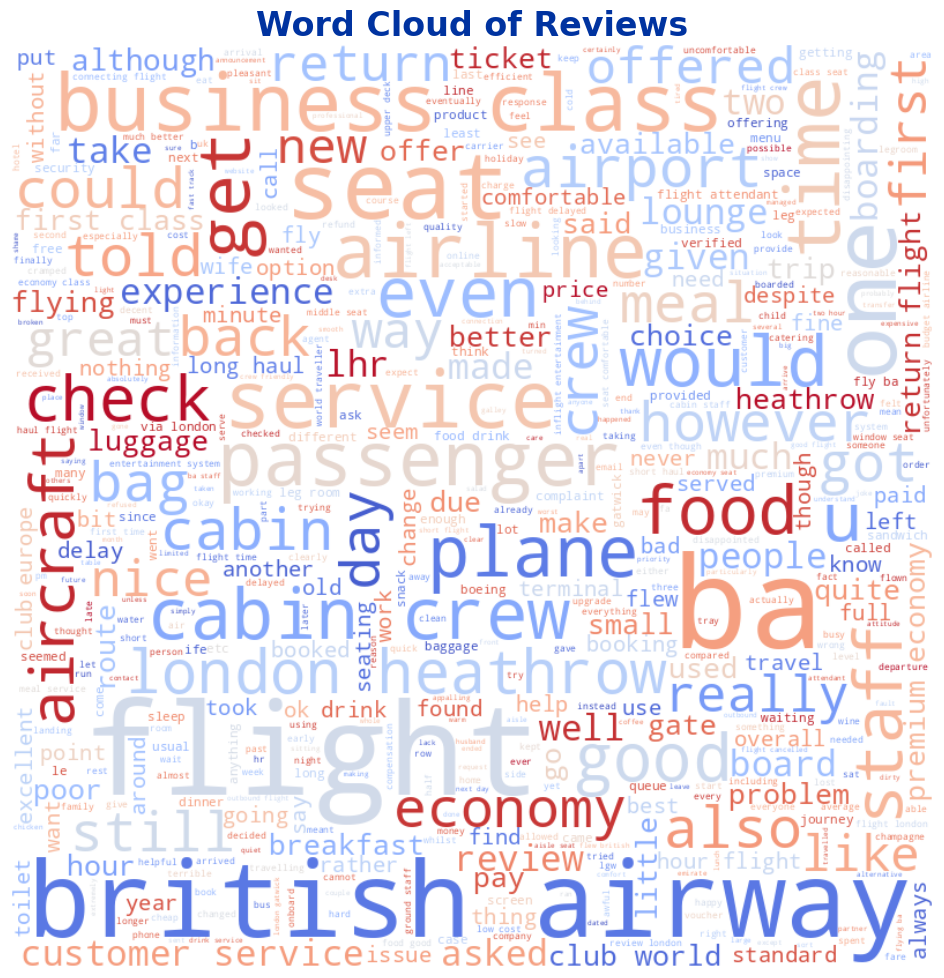

In [ ]:
import nltk
from nltk.corpus import stopwords

# Gabungkan semua teks ulasan
reviews = " ".join(df.corpus)

# Tentukan stopwords
stop_words = set(stopwords.words('english'))

# Buat dan generate word cloud dengan warna British Airways
wordcloud = WordCloud(height=800, width=800,
                      background_color='white',
                      stopwords=stop_words,
                      max_font_size=110,
                      max_words=500,
                      colormap='coolwarm').generate(reviews)

# Tampilkan word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Setel judul dengan nuansa British Airways
plt.title("Word Cloud of Reviews", fontsize=24, color="#0033A0", weight='bold')

# Tampilkan plot
plt.show()


Ada banyak kata yang tidak memberikan gambaran apakah ulasan bersifat positif atau negatif. Misalnya, kata-kata seperti 'penumpang', 'penerbangan', dll., tidak menambahkan nilai yang konklusif sehingga kita dapat memasukkannya ke dalam daftar stopwords.

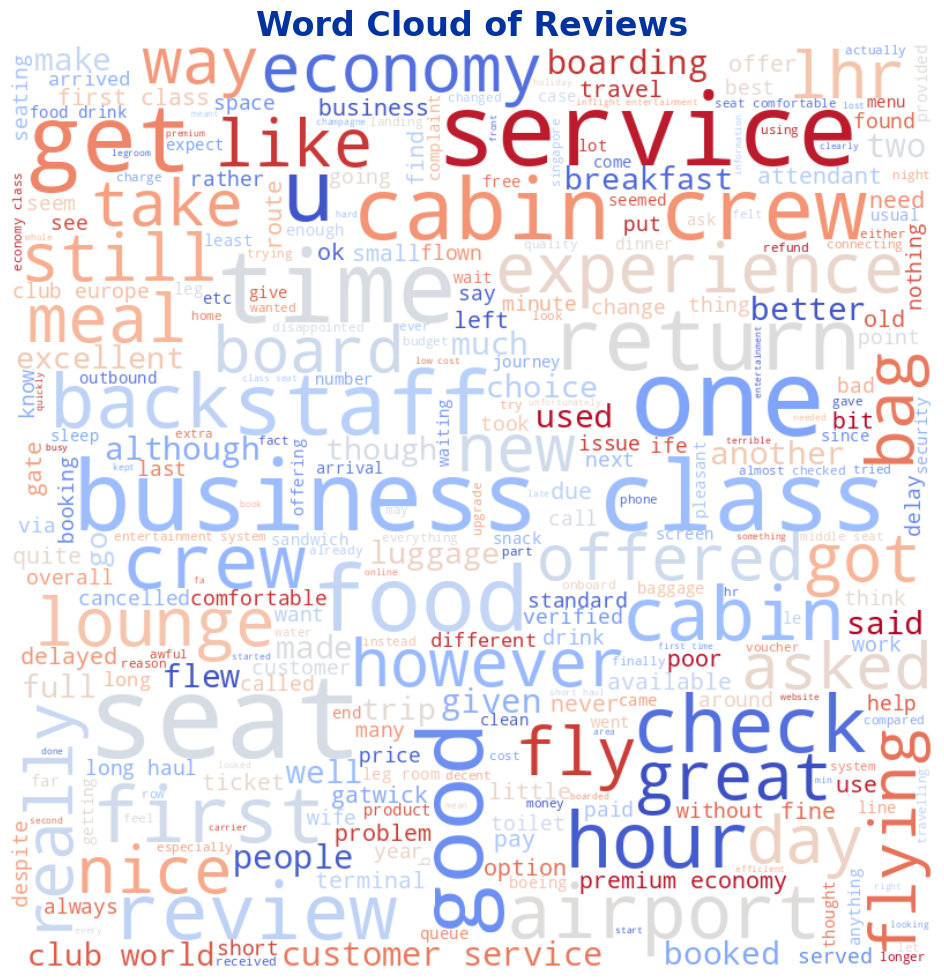

In [ ]:
import nltk
from nltk.corpus import stopwords
# Gabungkan semua teks ulasan
reviews = " ".join(df.corpus)

# Tentukan stopwords
stopwords_list = set(stopwords.words('english'))
stopwords_list.update(["ba", "flight", "british", "airway", "airline", "plane", "told", "also",
                       "passenger", "london", "heathrow", "aircraft", "could", "even", "would"])

# Buat dan generate word cloud dengan warna British Airways
wordcloud = WordCloud(height=800, width=800,
                      background_color='white',
                      stopwords=stopwords_list,
                      max_font_size=100,
                      max_words=300,
                      colormap='coolwarm').generate(reviews)

# Tampilkan word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Setel judul dengan nuansa British Airways
plt.title("Word Cloud of Reviews", fontsize=24, color="#0033A0", weight='bold')

# Tampilkan plot
plt.show()

## Word Frequency

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

<ipython-input-78-f711be7cbc02>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




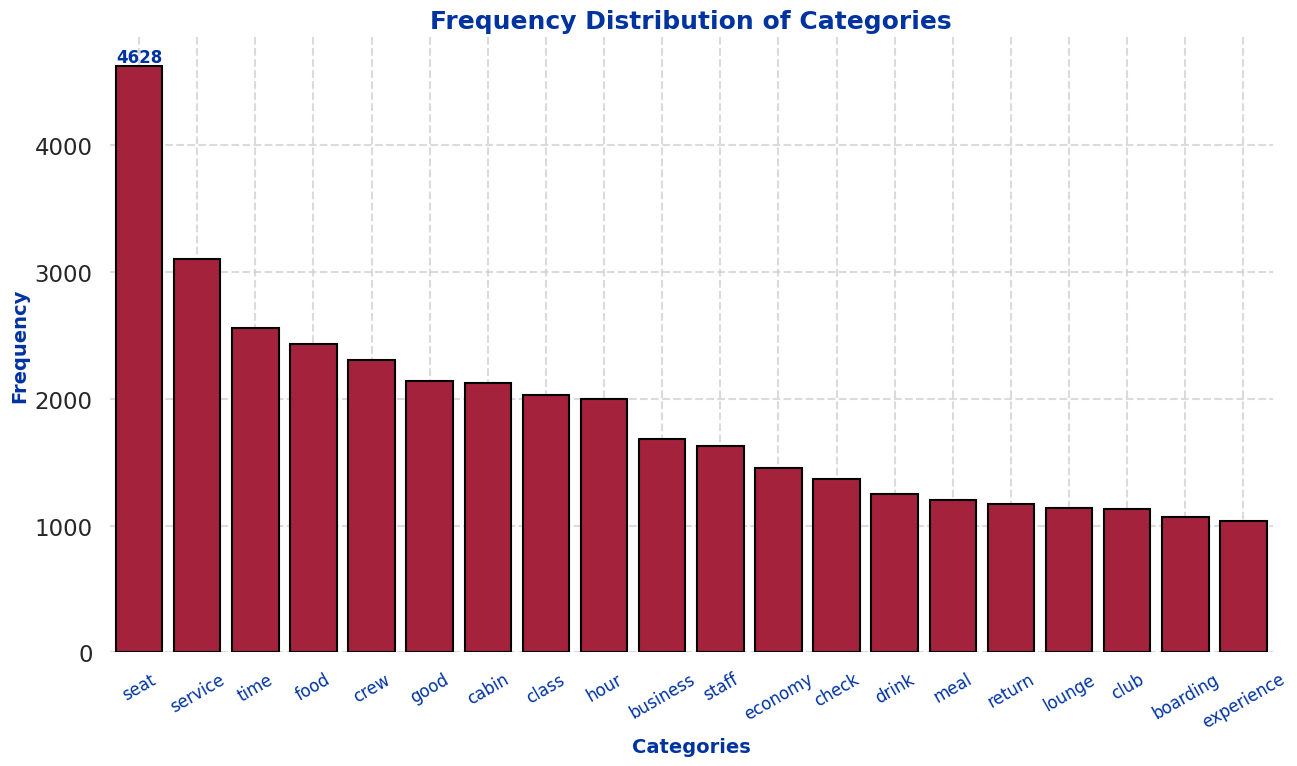

In [ ]:
# Set style and context
sns.set(style="whitegrid", context="talk")

# Setting figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Buat grafik batang dengan seaborn
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette=['#BA0C2F']*len(all_fdist), edgecolor='black')

# Tambahkan label ke setiap batang
all_plot.bar_label(all_plot.containers[0], fontsize=12, color="#0033A0", weight='bold')

# Setel label dan judul dengan nuansa British Airways
ax.set_xlabel("Categories", fontsize=14, color="#0033A0", weight='bold')
ax.set_ylabel("Frequency", fontsize=14, color="#0033A0", weight='bold')
ax.set_title("Frequency Distribution of Categories", fontsize=18, color="#0033A0", weight='bold')

# Rotate xticks for better readability
plt.xticks(rotation=30, fontsize=12, color="#0033A0")

# Tambahkan grid dengan gaya putus-putus
ax.grid(True, linestyle='--', alpha=0.7)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Tampilkan plot
plt.show()

Ini memberikan kita gambaran tentang apa yang sebenarnya dibicarakan pelanggan di sini. Kami melihat bahwa seat adalah topik yang paling sering dibicarakan tentang maskapai ini, diikuti oleh 'service' dan 'time' yang semuanya sangat penting bagi pelanggan dalam hal layanan. Namun, kami masih belum tahu bagaimana mereka mengekspresikan pendapat mereka tentang masing-masing layanan ini. Untuk memberikan makna lebih pada istilah-istilah ini, kami akan menggunakan plot ngram untuk melihat apakah pengalaman tersebut baik atau buruk.

## Word Frequency with N-gram

<Axes: >

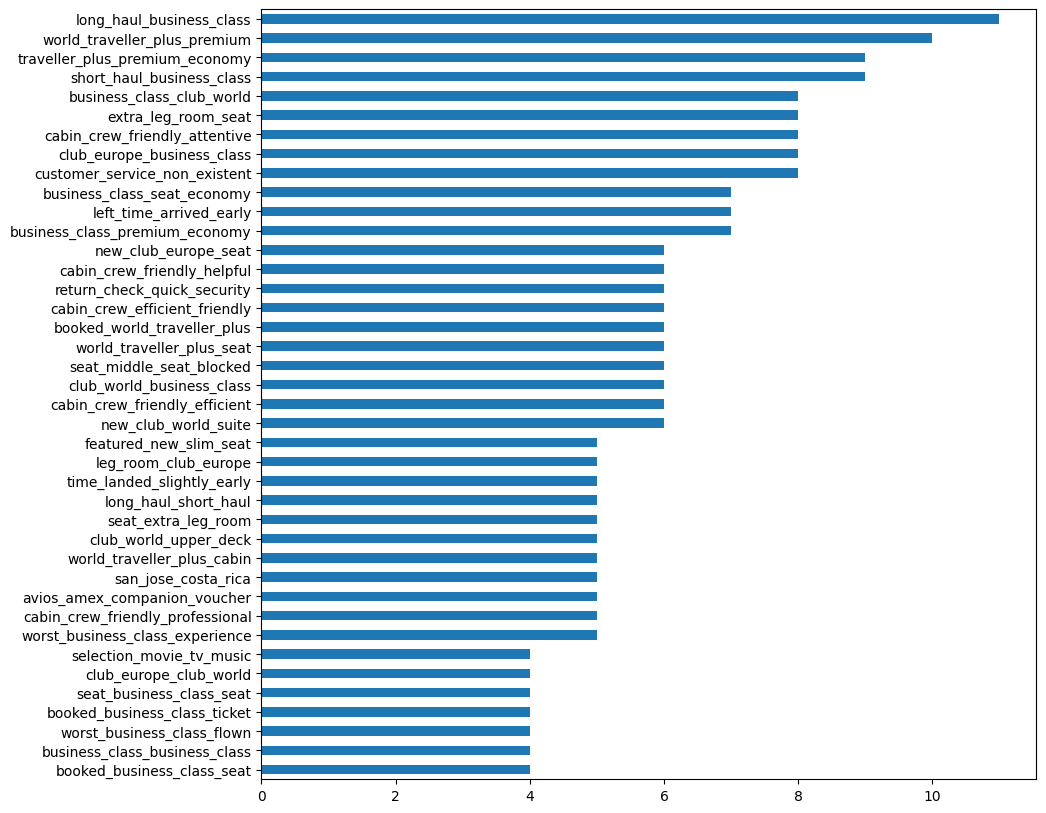

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

Kita dapat melihat bahwa ada banyak istilah positif yang umum terkait dengan kru kabin. Misalnya, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, dll. Jadi, pasti pelanggan memberikan ulasan yang baik tentang staf kru kabin British Airways.

Namun, ada satu pendekatan lain yang bisa kita coba untuk menemukan frekuensi kata yang akan memberi kita gambaran yang lebih baik. Kita akan mengelompokkan ulasan berdasarkan rating. Misalnya, kita anggap rating 1-3 adalah ulasan buruk, 4-6 adalah pengalaman rata-rata/baik, dan 7-10 menunjukkan pengalaman yang sangat baik.

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

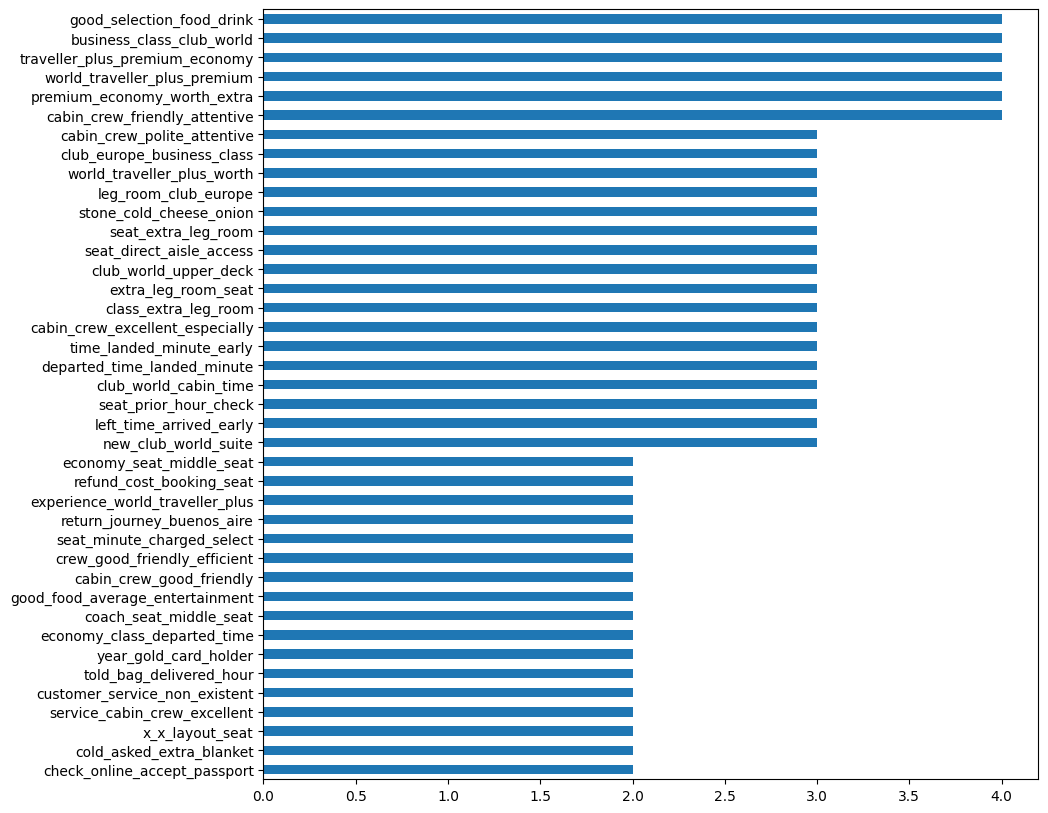

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

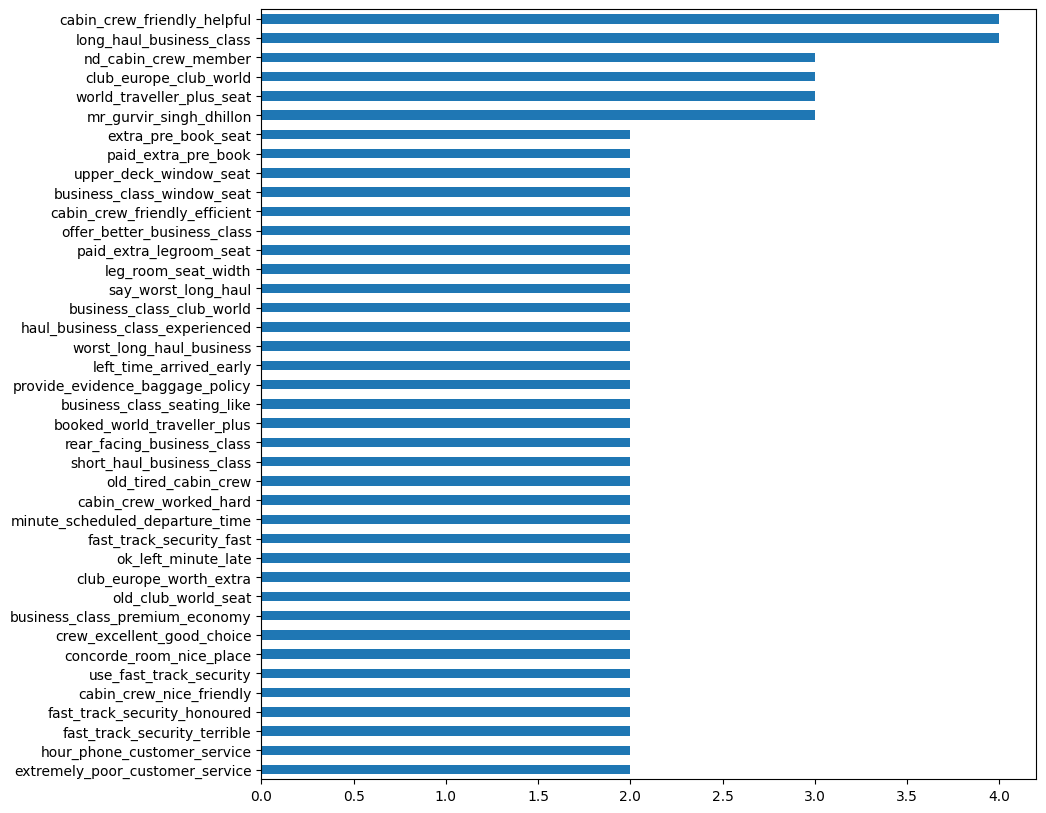

In [ ]:

new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

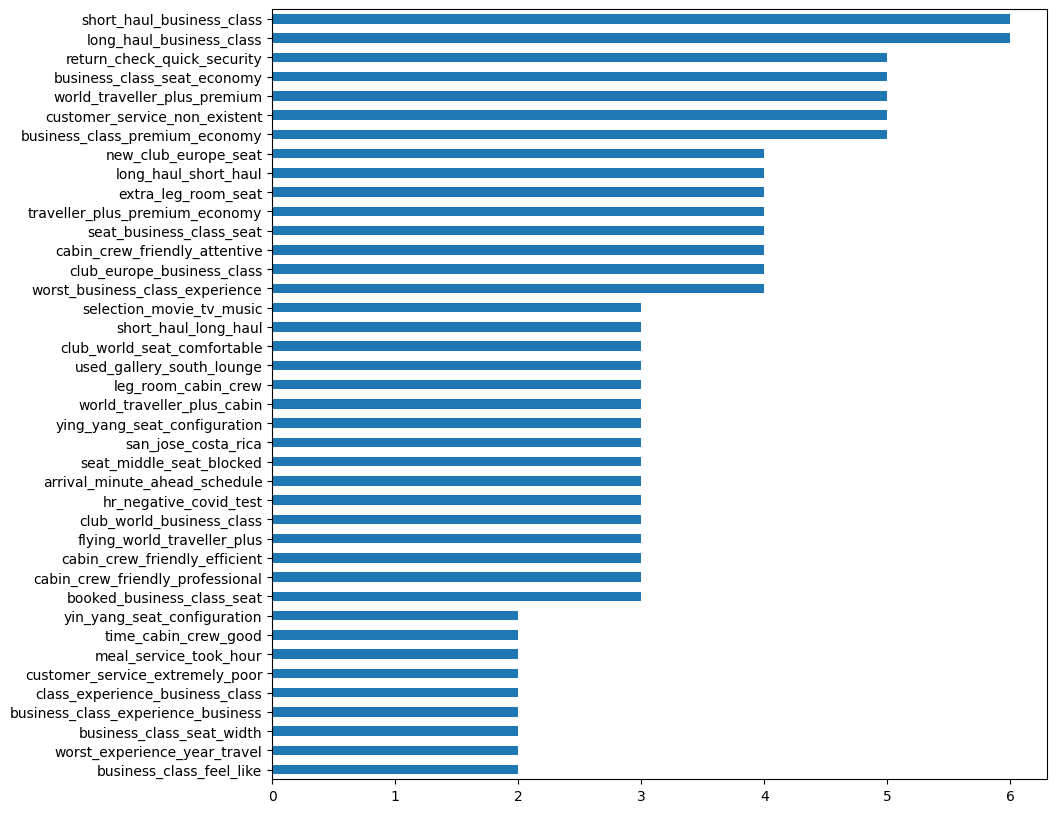

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

****

Now we will use textblob library to define if the text is negative or positive and to what extent


In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [ ]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2605 number of reviews between -0.2 and 0.2 polarity score
1509 number of reviews between -0.1 and 0.1 polarity score


Skor polaritas diberikan antara -1 hingga 1, dan semakin mendekati nilai -1, itu menunjukkan ulasan negatif, dan sebaliknya, semakin mendekati nilai positif, itu menunjukkan ulasan positif. Jika kita mempertimbangkan ambang batas di mana ulasan dengan polaritas lebih besar dari 0,2 dianggap positif dan kurang dari -0,2 dianggap negatif, kita akan mendapatkan 2286 ulasan yang berada di zona netral. Untuk lebih mempersempit jumlah ulasan netral ini, mari kita ambil ambang batas 0,1.

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [ ]:
df.label.value_counts()

,count
label,
1,2446
-1,1270
0,128


## Topic Modeling with LDA


In [ ]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,airway,94.2,lounge,634.5,bag,600.9,seat,3119.0,flight,2466.8,flight,3010.1,flight,322.6,tea,66.0
1,british,90.6,flight,626.9,check,366.4,ba,2147.0,good,1195.4,ba,1495.8,ba,255.9,meal,63.9
2,crew,42.6,service,529.1,staff,351.6,class,1673.3,crew,921.4,hour,999.6,london,157.8,asked,62.3
3,service,37.6,food,478.9,luggage,326.9,flight,1554.6,ba,876.0,british,818.3,lhr,129.5,staff,61.8
4,london,34.0,drink,464.8,flight,300.9,business,1346.4,seat,844.5,airway,816.9,staff,117.0,drink,53.9
5,review,22.6,crew,454.0,boarding,289.6,food,1163.7,time,757.7,service,779.0,check,99.2,airline,53.6
6,like,19.4,meal,393.6,ba,267.9,service,1083.7,lhr,667.5,customer,776.5,service,88.8,back,49.5
7,cabin,19.4,time,360.9,passenger,227.7,economy,1035.1,cabin,666.1,london,687.7,airport,81.5,london,48.4
8,made,18.3,club,358.9,baggage,211.1,airline,992.1,food,647.7,time,684.4,heathrow,80.7,flight,46.0
9,customer,17.6,good,351.9,gate,201.8,cabin,989.2,service,497.2,would,661.4,day,80.5,airway,42.2


## Topic modeling with NMF

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.        , 0.42298587],
       [0.03287919, 0.04017961],
       [0.0496913 , 0.0464815 ],
       ...,
       [0.11902705, 0.17280798],
       [0.02899994, 0.03312236],
       [0.10636928, 0.        ]])

In [ ]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,21.1,flight,21.3
1,ba,12.0,ba,7.2
2,class,9.4,hour,4.9
3,food,7.6,time,4.0
4,business,7.5,london,3.5
5,service,7.3,airway,3.4
6,cabin,7.1,british,3.4
7,crew,6.7,service,3.3
8,good,6.6,would,2.9
9,economy,5.6,day,2.6
